# Perceptron

## [Frank Rosenblatt (pdf)](http://dspace.library.cornell.edu/bitstream/1813/18965/2/Rosenblatt_Frank_1971.pdf)


![Mark 1 Perceptron](rosenblattPerceptronMark1.png)

### References
1. [Principles of Neurodynamics](https://apps.dtic.mil/dtic/tr/fulltext/u2/256582.pdf)

Note this is a 30mb pdf

2.

This is a book on [Brain Theory](http://www.bookmetrix.com/detail/chapter/9609d5c4-a997-4ff9-8328-b849c6e82057#citations) that has several historical chapters including one on Rosenblatt.


3. From the preface

For this writer, the perceptron program is not primarily concerned with the invention of devices for "artificialintelligence", but rather with investigating the physical structures and neurodynamic principles which under lie "natural intelligence". A perceptron is first and fore most a brain model, not an invention for pattern recognition. As a brain model, its utility is in enabling us to determine the physical conditions for the emergence of various psychological properties.


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as p

## The Rules

1. $I = \sum_{i=1}^{n} w_i~x_i$
2. If $I \ge T$ then $y = +1$ else if $I \lt T$ then $y = -1$.
3. if answer correct, then $\beta = +1$, else if answer incorrect then $\beta = -1$.
4. $\mathbf{w_{new}} = \mathbf{w_{old}} + \beta y \mathbf{x}$


### You are the Perceptron

First, demonstrate your understanding with pencil and paper. Beginning with an input of $\begin{bmatrix}0.3 \\ 0.7 \end{bmatrix}$, an initial set of weights of $\begin{bmatrix}-0.6\\0.8\end{bmatrix}$, and a **class** of 1. Compute the value of the new weight vector with pen and paper. 

Do it in code.

1. Set up a numpy array to hold all of your input patterns, and their class assignments. What might our data structure look like?


In [2]:
import numpy as np

In [3]:
ins = np.array([
    [np.array([0.3,0.7])   ,  1.0],
    [np.array([-0.6,0.3])  , -1.0],
    [np.array([0.7,0.3])   ,  1.0],
    [np.array([-0.2,-0.8]) , -1.0]])                

2. Create an array to hold your starting weights

In [4]:
print(ins[1])

[array([-0.6,  0.3]) -1.0]


In [5]:
np.append(ins[1][0],1.0)

array([-0.6,  0.3,  1. ])

In [6]:
w = np.array([-0.6,0.8,])

Write a function to implement the updating rule.

In [7]:
def updPercep (i,wt,T=0):
    ipt = i[0]
    cls = i[1]
    y = 1 if (ipt @ wt) >= T else -1
    Beta = 1 if y == cls else -1
    return (wt + Beta*y*ipt)

Test it. Use the same one you did by hand.

In [8]:
wp = updPercep(ins[0],w)
print(wp)

[-0.3  1.5]


How does the network do with this original input for classifying these four cases?

In [9]:
wtest = w
for i in ins:
    print(np.sign(i[0] @ wtest) == i[1]) 

True
False
False
True


Now train it for each of the four inputs shown above.

In [10]:
neww = np.array([w])
for patt in ins:
    tempw = updPercep(patt,neww[-1])
    neww = np.append(neww,np.array([updPercep(patt,neww[-1])]),axis=0)

In [11]:
print(neww)

[[-0.6  0.8]
 [-0.3  1.5]
 [ 0.3  1.2]
 [ 1.   1.5]
 [ 1.2  2.3]]


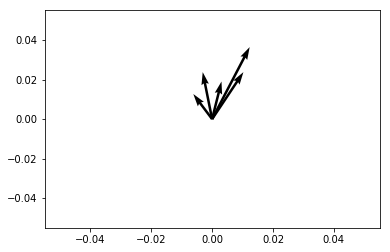

In [12]:
origin = [0],[0]
p.quiver(*origin, neww[:,0],neww[:,1],scale= 2.3,units='inches')
p.show()

How is our network doing now?

Geometrically, what does the weight vector mean, and what is the significane of the perpendicular to the weight vector?

1. What is the relation between the inner product of two vectors and the cosine of the angle between them?
2. What is the **sign** for the cosine of angles less than 90 degrees and those greater than 90 degrees?
3. How do these facts help us to answer the question above?
4. Why does this reinforce the advice to think *geometrically* when thinking about networks and weight vectors?

In [13]:
# What is that asterisk origin doing?
a = [1, 2, 3]

def printInput(i1,i2,i3):
    print(i1)
    print(i2)
    print(i3)

printInput(*a)


1
2
3


## Rules are Made to be Broken (or at least update)

### The Delta Rule

$$\Delta~w_i = x_i~\eta(desired - observed)$$

### Classroom exercise

Replace the perceptron learning rule with the Delta rule and run a few rounds with the above data (or make your own using the random library)

In [14]:
import random
print([random.random() for i in range(0, 10)])

[0.6448309599874429, 0.48031866002348733, 0.3154714082603596, 0.7295517492182578, 0.5735453441219467, 0.17865342810366902, 0.8844250105313841, 0.01866621116688849, 0.39692560652866116, 0.07436005089225528]


1. How do you know when to stop applying the delta rule?
2. What happens to your weights if you don't stop?



### Homework:

1. Provide a table showing the XOR function (inputs and outputs)
2. Show how you can compute this function using a two layer network and only (all? some?) of the Boolean functions **AND**, **OR**, **NOTAND** aka **NAND**.
3. Using your understanding of how weight vectors relate to the decision plane hardcode a network in python that will allow me to input a two valued tuple (e.g. (0,1)) and where your network will correctly compute the XOR solution and print, and where this will repeat until I chose to quit.
4. Note you will need a *bias*. Thus your network will assume that all my end puts have a third input value that is always "1", and the weight vectors of your network have three values.
5. In a markdown cell in your python notebook tell me why this network can't be built with one layer, why it is possible to build it with more than one, and how this connects, however you may understand it, with all this talk about deep networks that is frequently in the news. These answers can be brief. Don't write a book. Short. Concise. I just want to see what you are thinking. 